In [122]:
import pandas as pd

df = pd.read_csv("runs.csv")

new_cols = pd.DataFrame()
new_cols['images'] = df.classes * df.samples
new_cols['pixels'] = new_cols.images * df.image_height * df.image_width
new_cols['connections'] = df.dense_layer_1 * df.dense_layer_2 + df.dense_layer_2 * df.classes
new_cols['training_time_total'] = df.training_time_hours * 3600 + df.training_time_minutes * 60 + df.training_time_seconds
new_cols['training_time_per_epoch'] = new_cols.training_time_total / df.epochs
df['training_perc'] = (df.training*100).round(0).astype(int)
new_cols['model_file'] = df.agg('vgg16_{0[classes]}_{0[samples]}_{0[image_height]}_{0[training_perc]}_{0[dense_layer_1]}x{0[dense_layer_2]}.h5'.format, axis=1)

df = pd.concat([df.loc[:, :'samples'], 
           new_cols['images'], 
           df.loc[:, 'image_height':'image_width'],
           new_cols['pixels'],
           df.loc[:, 'training':'dense_layer_2'],
           new_cols['connections'],
           df.loc[:, 'accuracy':'training_time_seconds'],
           new_cols[['training_time_total','training_time_per_epoch','model_file']]           
          ],axis=1, join='inner')
df = df.sort_values(by=['accuracy', 'loss'], ascending=(False, True))
df

,classes,samples,images,image_height,image_width,pixels,training,validation,dense_layer_1,dense_layer_2,connections,accuracy,loss,epochs,training_time_hours,training_time_minutes,training_time_seconds,training_time_total,training_time_per_epoch,model_file
0,3,100,300,224,224,15052800,0.9,0.1,1024,1024,1051648,0.9300,0.2113,26,0,37,9,2229,85.730769,vgg16_3.0_100.0_224.0_90.0_1024.0x1024.0.h5
1,3,100,300,224,224,15052800,0.9,0.1,512,512,263680,0.9000,0.3674,31,0,43,12,2592,83.612903,vgg16_3.0_100.0_224.0_90.0_512.0x512.0.h5
2,3,200,600,224,224,30105600,0.9,0.1,1024,1024,1051648,0.8167,0.5091,10,0,28,12,1692,169.200000,vgg16_3.0_200.0_224.0_90.0_1024.0x1024.0.h5
3,3,100,300,128,128,4915200,0.9,0.1,4096,4096,16789504,0.8000,0.5229,22,0,13,26,806,36.636364,vgg16_3.0_100.0_128.0_90.0_4096.0x4096.0.h5
5,3,100,300,128,128,4915200,0.9,0.1,1024,1024,1051648,0.8000,0.5418,16,0,7,43,463,28.937500,vgg16_3.0_100.0_128.0_90.0_1024.0x1024.0.h5
4,3,100,300,224,224,15052800,0.9,0.1,4096,4096,16789504,0.8000,0.6720,10,0,18,9,1089,108.900000,vgg16_3.0_100.0_224.0_90.0_4096.0x4096.0.h5
6,10,100,1000,128,128,16384000,0.9,0.1,4096,4096,16818176,0.5400,1.3092,22,0,43,26,2606,118.454545,vgg16_10.0_100.0_128.0_90.0_4096.0x4096.0.h5
7,10,200,2000,128,128,32768000,0.9,0.1,4096,4096,16818176,0.5300,1.4626,17,1,3,42,3822,224.823529,vgg16_10.0_200.0_128.0_90.0_4096.0x4096.0.h5
8,10,50,500,128,128,8192000,0.9,0.1,4096,4096,16818176,0.4400,1.8252,16,0,16,14,974,60.875000,vgg16_10.0_50.0_128.0_90.0_4096.0x4096.0.h5


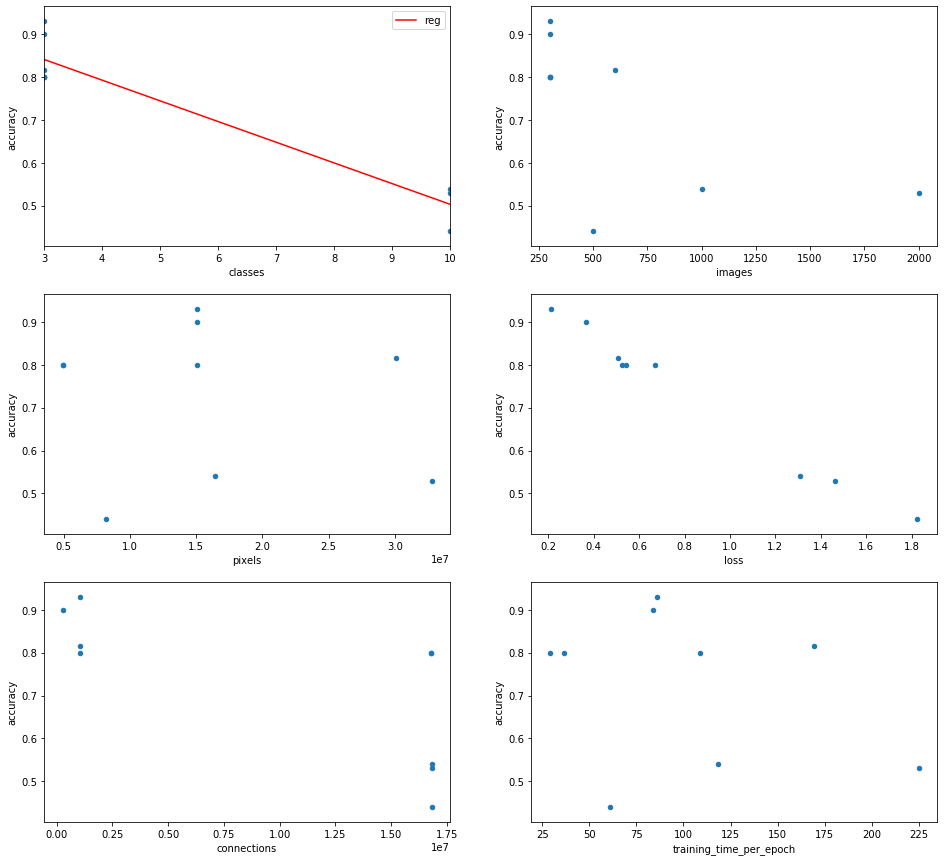

In [137]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(16,15))

d = np.polyfit(df['classes'],df['accuracy'],1)
f = np.poly1d(d)
df['reg'] = f(df['classes'])
df.plot.scatter(ax=ax[0][0], x='classes', y='accuracy')
df.plot.line(x='classes', y='reg',color='Red',ax=ax[0][0])


df.plot.scatter(ax=ax[0][1], x='images', y='accuracy')
df.plot.scatter(ax=ax[1][0], x='pixels', y='accuracy')
df.plot.scatter(ax=ax[1][1], x='loss', y='accuracy')
df.plot.scatter(ax=ax[2][0], x='connections', y='accuracy')
df.plot.scatter(ax=ax[2][1], x='training_time_per_epoch', y='accuracy')

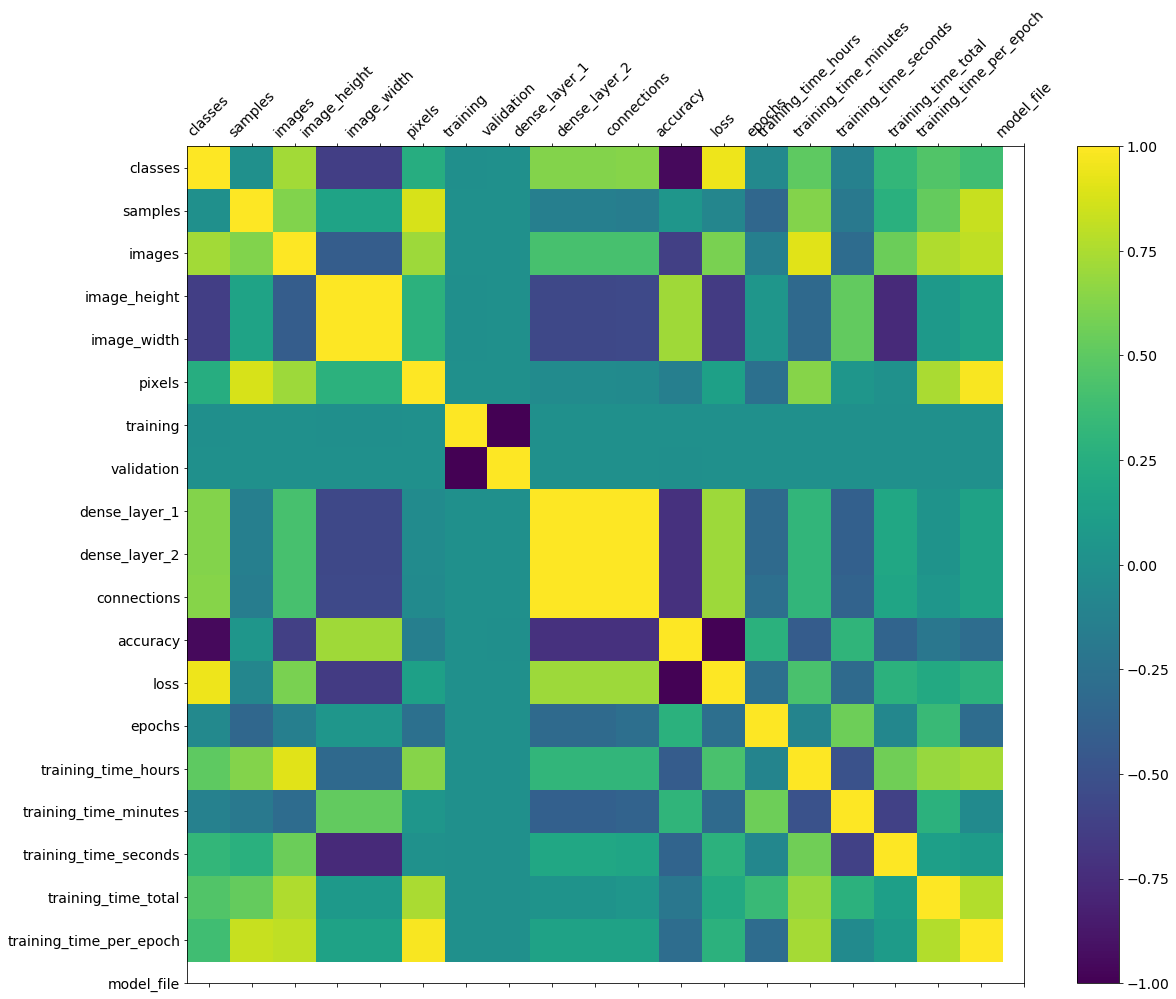

In [107]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)